## Final Project Submission

Please fill out:
* Student name: Aly (Aleigha Sardina-Spevack)
* Student pace: self paced
* Scheduled project review date/time: 
* Instructor name: Eli 
* Blog post URL:



## First things first...
A few libraries as well as the data itself must be loaded into the notebook.  Here is where we start poking around a little to see what sort of data we have and getting a general of idea of the types of questions we need to ask.   

In [1]:
#Library imports and using the magic key for inline plotting in matplot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [2]:
#loading .csv dataset into a dataframe
df = pd.read_csv('kc_house_data.csv')
#viewing header to ensure it loaded properly
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
#getting a feel for the data by reviewing column names and looking at some info related to the values in each column/series
col_name = list(df.columns)
print(col_name)
df.info()

['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 

## Data Cleaning
Hmmm... looks a bit messy

After a little bit of exploring, it looks like we have some 'dirt' in our data that we'll need to clean up.  Waterfront data seems to be missing some values, as does year renovated and view.  Then we have a text column for sqft_basement which doesn't match our other column with above grade sqft.  We'll walk through each of these one by one to see how we can tidy up a bit. 

In [4]:
#reviewing dataset
df.sqft_basement.describe()

count     21597
unique      304
top         0.0
freq      12826
Name: sqft_basement, dtype: object

In [5]:
df.sqft_basement.unique()

array(['0.0', '400.0', '910.0', '1530.0', '?', '730.0', '1700.0', '300.0',
       '970.0', '760.0', '720.0', '700.0', '820.0', '780.0', '790.0',
       '330.0', '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0',
       '600.0', '560.0', '550.0', '1000.0', '1600.0', '500.0', '1040.0',
       '880.0', '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0',
       '710.0', '840.0', '380.0', '770.0', '480.0', '570.0', '1490.0',
       '620.0', '1250.0', '1270.0', '120.0', '650.0', '180.0', '1130.0',
       '450.0', '1640.0', '1460.0', '1020.0', '1030.0', '750.0', '640.0',
       '1070.0', '490.0', '1310.0', '630.0', '2000.0', '390.0', '430.0',
       '850.0', '210.0', '1430.0', '1950.0', '440.0', '220.0', '1160.0',
       '860.0', '580.0', '2060.0', '1820.0', '1180.0', '200.0', '1150.0',
       '1200.0', '680.0', '530.0', '1450.0', '1170.0', '1080.0', '960.0',
       '280.0', '870.0', '1100.0', '460.0', '1400.0', '660.0', '1220.0',
       '900.0', '420.0', '1580.0', '1380.0', '475.0', 

Ah ha!  It looks like we've encountered a common problem.  A whole data series is represented as a string ebcause of one value.  In our case a '?'.  We should see how many '?'s there are before we move on.

In [6]:
df['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
800.0       201
400.0       184
1000.0      148
300.0       142
900.0       142
200.0       105
750.0       104
480.0       103
450.0       103
530.0       103
720.0        98
620.0        90
580.0        84
840.0        83
420.0        81
860.0        79
1100.0       78
670.0        78
550.0        76
780.0        76
650.0        75
240.0        74
680.0        73
380.0        73
360.0        72
          ...  
768.0         1
2250.0        1
1008.0        1
2850.0        1
475.0         1
1816.0        1
2300.0        1
2610.0        1
915.0         1
588.0         1
2240.0        1
556.0         1
143.0         1
2180.0        1
3260.0        1
1275.0        1
1960.0        1
4820.0        1
1798.0        1
374.0         1
906.0         1
65.0          1
4130.0        1
417.0         1
1135.0        1
2050.0        1
1913.0        1
666.0         1
2390.0        1
946.0         1
Name: sqft_basement, Len

There are 452 ? and 12798 0s.  Seems like basements aren't popular in Kings County.  Let's change our ? to 0's since 0 is the mode of the dataset by a very large margin.

In [7]:
#changing ? to 0.0 so our data set reads as a floating point number, eventually.
df['sqft_basement'] = df['sqft_basement'].replace('?', '0.0')

In [8]:
#looking at our data series again 
df.sqft_basement.describe()

count     21597
unique      303
top         0.0
freq      13280
Name: sqft_basement, dtype: object

In [9]:
df.sqft_basement.unique()

array(['0.0', '400.0', '910.0', '1530.0', '730.0', '1700.0', '300.0',
       '970.0', '760.0', '720.0', '700.0', '820.0', '780.0', '790.0',
       '330.0', '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0',
       '600.0', '560.0', '550.0', '1000.0', '1600.0', '500.0', '1040.0',
       '880.0', '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0',
       '710.0', '840.0', '380.0', '770.0', '480.0', '570.0', '1490.0',
       '620.0', '1250.0', '1270.0', '120.0', '650.0', '180.0', '1130.0',
       '450.0', '1640.0', '1460.0', '1020.0', '1030.0', '750.0', '640.0',
       '1070.0', '490.0', '1310.0', '630.0', '2000.0', '390.0', '430.0',
       '850.0', '210.0', '1430.0', '1950.0', '440.0', '220.0', '1160.0',
       '860.0', '580.0', '2060.0', '1820.0', '1180.0', '200.0', '1150.0',
       '1200.0', '680.0', '530.0', '1450.0', '1170.0', '1080.0', '960.0',
       '280.0', '870.0', '1100.0', '460.0', '1400.0', '660.0', '1220.0',
       '900.0', '420.0', '1580.0', '1380.0', '475.0', '690.

In [10]:
#Casting our column as a string
df['sqft_basement'] = df['sqft_basement'].astype('float64')

In [11]:
df.sqft_basement.describe()

count    21597.000000
mean       285.716581
std        439.819830
min          0.000000
25%          0.000000
50%          0.000000
75%        550.000000
max       4820.000000
Name: sqft_basement, dtype: float64

Looking good.  We'll have a bit more to do before we can wrap our heads around what our data looks like.  This is, however, an iterative process and we should expect mroe tidying do to after this first round.

I would be willing to bet that the next easiet to handle here would be year renovated so that would be a good place to start.  I presume that properties that haven't yet been renovated or where the renovations aren't substantial enough to be captured in our data will have a bunch of empty values.  If I'm right we'll go right ahead and fill them in with 'NaN'

In [12]:
df.yr_renovated.describe()

count    17755.000000
mean        83.636778
std        399.946414
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2015.000000
Name: yr_renovated, dtype: float64

In [13]:
df.yr_renovated.unique()

array([   0., 1991.,   nan, 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990.,
       1988., 1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989.,
       2004., 1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971.,
       1979., 1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008.,
       1968., 2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955.,
       1982., 1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957.,
       1959., 1960., 1967., 1965., 1934., 1972., 1944., 1958.])

It looks like my hunch was correct.  Let's take care of that.

In [14]:
df['yr_renovated'] = df['yr_renovated'].replace('0.', 'NaN' )

In [15]:
df.yr_renovated.unique()

array([   0., 1991.,   nan, 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990.,
       1988., 1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989.,
       2004., 1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971.,
       1979., 1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008.,
       1968., 2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955.,
       1982., 1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957.,
       1959., 1960., 1967., 1965., 1934., 1972., 1944., 1958.])

In [16]:
df['yr_renovated'] = df['yr_renovated'].replace('nan', 'NaN' )

In [17]:
df.yr_renovated.unique()

array([   0., 1991.,   nan, 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990.,
       1988., 1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989.,
       2004., 1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971.,
       1979., 1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008.,
       1968., 2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955.,
       1982., 1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957.,
       1959., 1960., 1967., 1965., 1934., 1972., 1944., 1958.])

In [18]:
#replacing nan with 'NaN' to be consistent with what we'll change all the 0's to
df['yr_renovated'] = df.yr_renovated.fillna('NaN')

In [19]:
#Change hte 0 value to 'NaN'
df['yr_renovated'] = df.yr_renovated.replace(0.0, 'NaN')

In [20]:
df.yr_renovated.unique()

array(['NaN', 1991.0, 2002.0, 2010.0, 1992.0, 2013.0, 1994.0, 1978.0,
       2005.0, 2003.0, 1984.0, 1954.0, 2014.0, 2011.0, 1983.0, 1945.0,
       1990.0, 1988.0, 1977.0, 1981.0, 1995.0, 2000.0, 1999.0, 1998.0,
       1970.0, 1989.0, 2004.0, 1986.0, 2007.0, 1987.0, 2006.0, 1985.0,
       2001.0, 1980.0, 1971.0, 1979.0, 1997.0, 1950.0, 1969.0, 1948.0,
       2009.0, 2015.0, 1974.0, 2008.0, 1968.0, 2012.0, 1963.0, 1951.0,
       1962.0, 1953.0, 1993.0, 1996.0, 1955.0, 1982.0, 1956.0, 1940.0,
       1976.0, 1946.0, 1975.0, 1964.0, 1973.0, 1957.0, 1959.0, 1960.0,
       1967.0, 1965.0, 1934.0, 1972.0, 1944.0, 1958.0], dtype=object)

In [21]:
#checking the dataframe again to see what it looks like now
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null float64
yr_built         21597 non-null int64
yr_renovated     21597 non-null object
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


Much better!  Onto the waterfront series, let's see what that looks like.

In [22]:
df.waterfront.describe()

count    19221.000000
mean         0.007596
std          0.086825
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: waterfront, dtype: float64

In [23]:
df.waterfront.unique()

array([nan,  0.,  1.])

Not what I expected!  It looks like a categorical data set.  Either the property is on the waterfront or it's not, or the data is not available.  The problem here is that it is stored as a floating point number.  This can lead to some improper inferences regarding our data. Luckily this isn't too complicated to fix.  Shall we?

In [24]:
#making our NaNs consistent
df['waterfront'] = df.waterfront.fillna('NaN')

In [25]:
#Casting our column as a string
df['waterfront'] = df['waterfront'].astype('str')

In [26]:
#checking again to make sure this worked
df.waterfront.describe()

count     21597
unique        3
top         0.0
freq      19075
Name: waterfront, dtype: object

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null object
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null float64
yr_built         21597 non-null int64
yr_renovated     21597 non-null object
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(7), int64(11), object(3)
memory usage: 3.5+ MB


Better and better everytime.  We'll do a little bit more with that data series later, but for now we just have one more column to clean before we do some more exploring.

In [28]:
df.view.describe()

count    21534.000000
mean         0.233863
std          0.765686
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          4.000000
Name: view, dtype: float64

In [29]:
df.view.unique()

array([ 0., nan,  3.,  4.,  2.,  1.])

Oh look, another category.  Looks like we're missing some data as well.  First, let's handle this the same way as the waterfront tag.  Then we'll see about the missing data.

In [30]:
#making our NaNs consistent
df['view'] = df.view.fillna('NaN')
#Casting our column as a string
df['view'] = df['view'].astype('str')

In [31]:
df.view.unique()

array(['0.0', 'NaN', '3.0', '4.0', '2.0', '1.0'], dtype=object)

In [32]:
df.view.describe()

count     21597
unique        6
top         0.0
freq      19422
Name: view, dtype: object

Looks like we managed to fill all the empty data with NaN because of the .fillna() function.  Let's check to see how many NaNs there are now.  It might be better just to delete those rows.

In [33]:
df.view.value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
NaN       63
Name: view, dtype: int64

We're going to do some quick math to see if that's soemthing we can do without affecting the integrity of our data.  

In [34]:
63/21597*100

0.29170718155299347

It's not even a 1/3 of a whole percentage.  They're as good as gone.

In [35]:
#droping the rows with NaN in the view column
df.drop(df[df.view == 'NaN'].index, inplace=True)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 0 to 21596
Data columns (total 21 columns):
id               21534 non-null int64
date             21534 non-null object
price            21534 non-null float64
bedrooms         21534 non-null int64
bathrooms        21534 non-null float64
sqft_living      21534 non-null int64
sqft_lot         21534 non-null int64
floors           21534 non-null float64
waterfront       21534 non-null object
view             21534 non-null object
condition        21534 non-null int64
grade            21534 non-null int64
sqft_above       21534 non-null int64
sqft_basement    21534 non-null float64
yr_built         21534 non-null int64
yr_renovated     21534 non-null object
zipcode          21534 non-null int64
lat              21534 non-null float64
long             21534 non-null float64
sqft_living15    21534 non-null int64
sqft_lot15       21534 non-null int64
dtypes: float64(6), int64(11), object(4)
memory usage: 3.6+ MB


## Let's have a look-see!

Our initial cleaning is done so let's have a look at the data.  In my opinion this is the exciting part: where we learn enough about the data to start asking some fun questions.


In [37]:
col_name

['id',
 'date',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

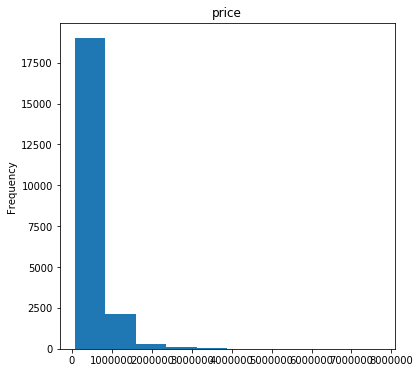

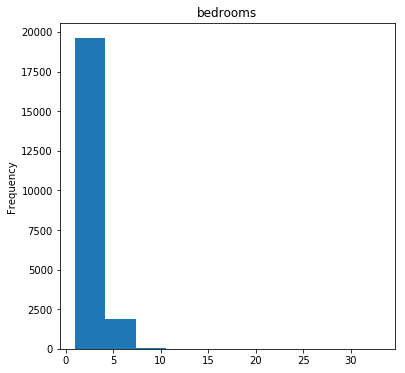

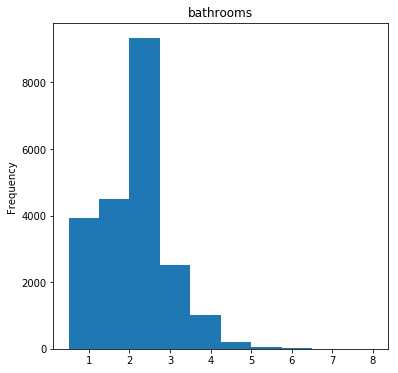

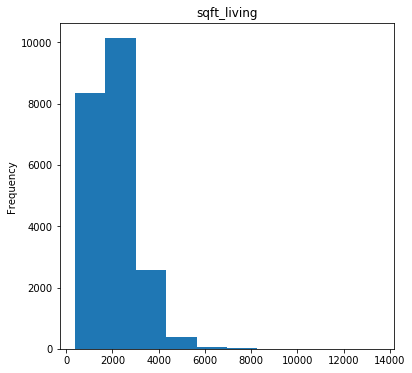

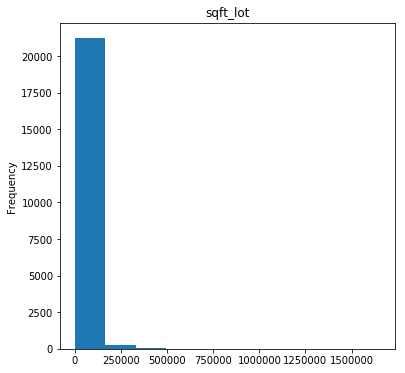

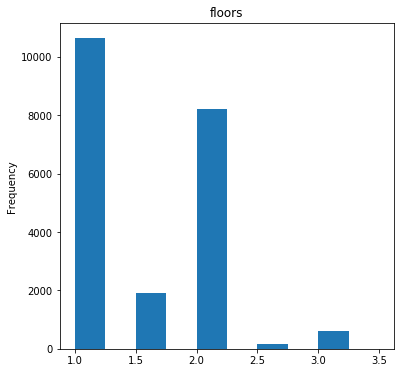

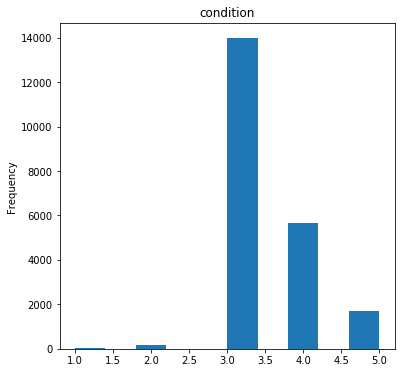

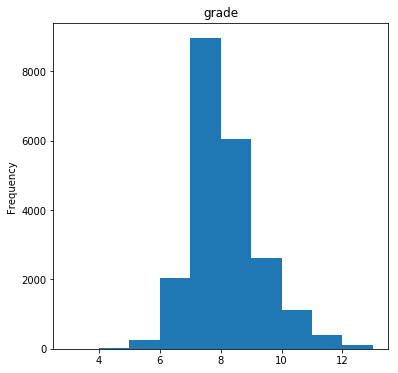

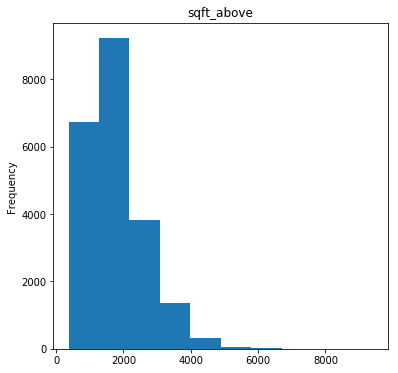

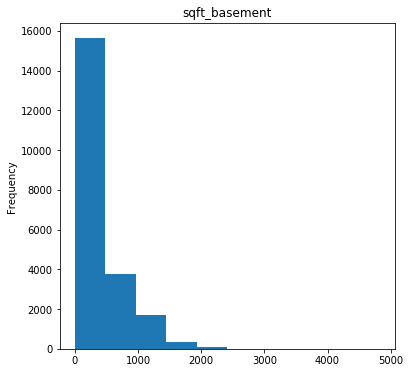

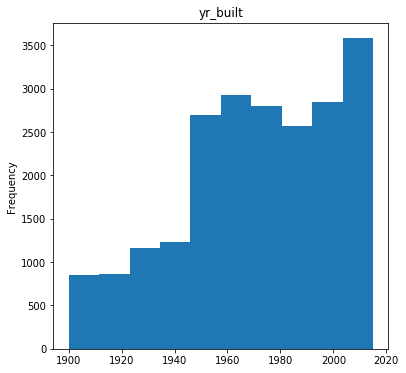

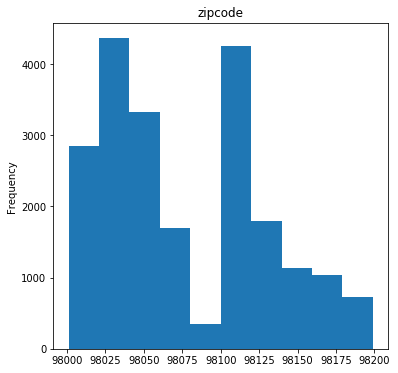

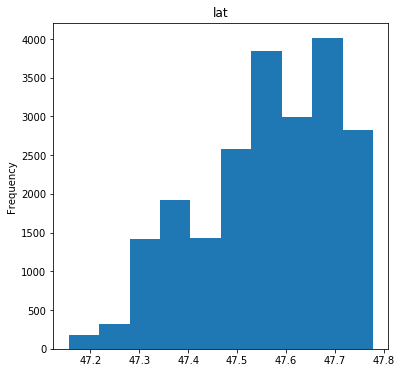

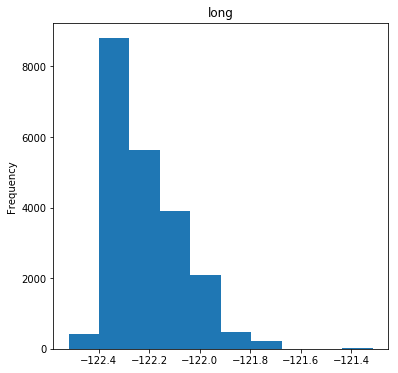

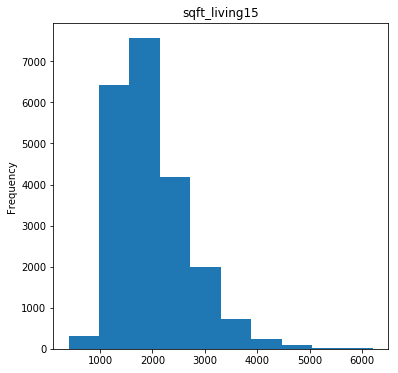

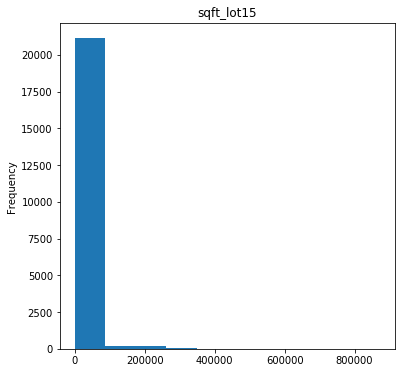

In [38]:
#using the col_name variable to build a for lopp to plot some histograms of our data to get a feel for the distributions
#first we'll need to update col_name to get rid of the columns that contain only strings it'll make our for loop throw an error
#we're leaving out yr_renovated since this only applies to a portion of our data.
#the gaps will make it tough to interpret
col_name =[ 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'condition', 'grade', 'sqft_above','sqft_basement','yr_built', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']

for col in col_name:
    df[col].plot.hist( figsize= (6,6))
    plt.title(col)
    plt.show()

Yikes!  Most of these look like they have significant skew.  First we're going to take out floors and condition because they definitely aren't continuous variables.  Then we can try to noramlize these and add a kde plot to see if we can clean these up a bit and get a better picture.   I think we might have some additional non-continuous variables, but it'll be a clearer picture in a moment.

C:\Users\sardi\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


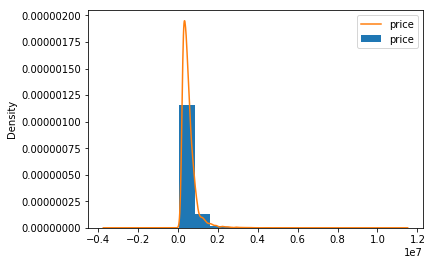

C:\Users\sardi\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


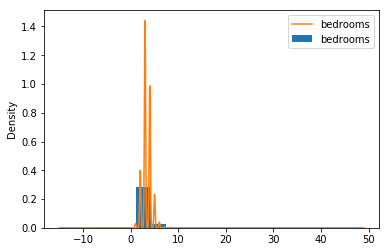

C:\Users\sardi\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


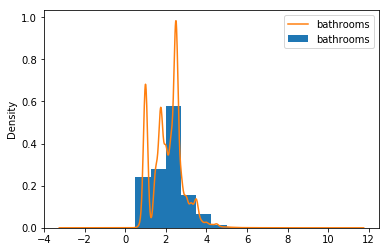

C:\Users\sardi\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


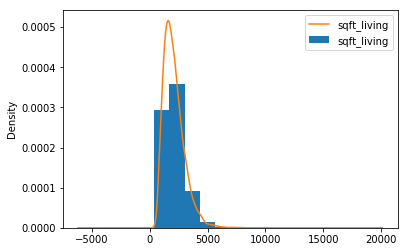

C:\Users\sardi\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


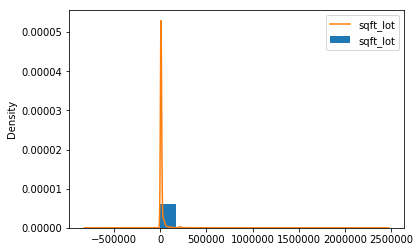

C:\Users\sardi\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


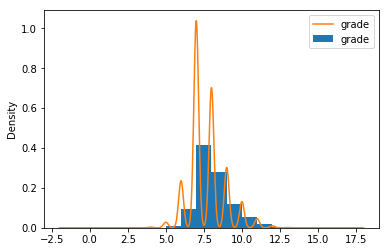

C:\Users\sardi\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


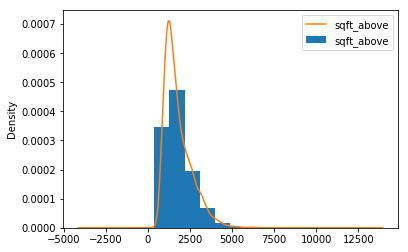

C:\Users\sardi\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


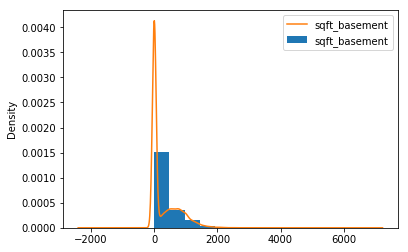

C:\Users\sardi\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


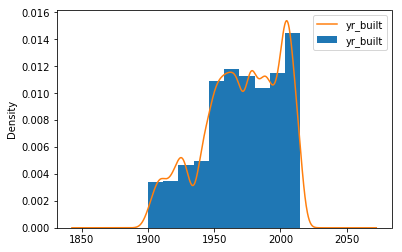

C:\Users\sardi\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


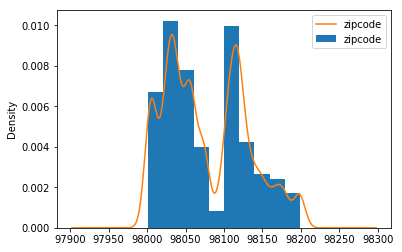

C:\Users\sardi\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


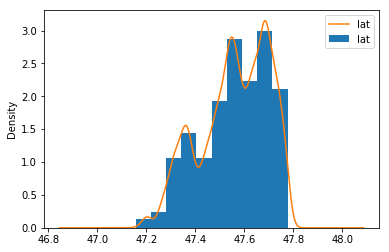

C:\Users\sardi\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


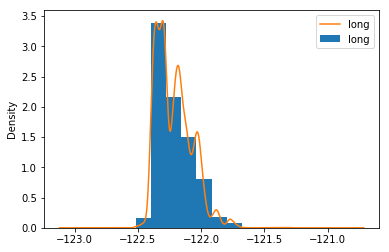

C:\Users\sardi\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


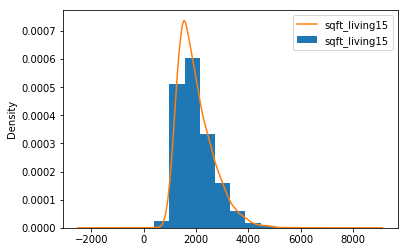

C:\Users\sardi\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


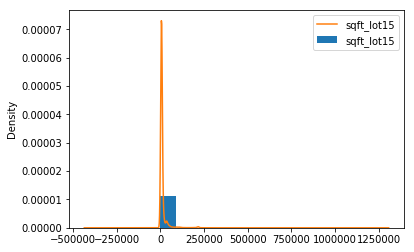

In [39]:
#Once again we'll use a for loop to iterate through each of the columns
continuous = [ 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',  'grade', 'sqft_above','sqft_basement','yr_built', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']

for col in continuous:
    df[col].plot.hist(normed=True)
    df[col].plot.kde(label=col)
    plt.legend()
    plt.show()


My hunch was proved.  Look at the orange line for bedroom and bathroom.  Clearly these are not continuous.  We can handle these as categories or we can bin them into buckets.  